In [14]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy
import csv
import pandas as pd
plt.matplotlib.rcParams['pdf.fonttype'] = 42

In [15]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

## Plot Confusion Matrix
---

In [16]:
def read_tracking_result(t):
    res = {}

    # Read the CSV file
    with open('output.csv', mode='r') as file:
        reader = csv.reader(file)
        
        keys = next(reader)
        
        for row in reader:
            res[float(row[0])] = {}
            for i, key in enumerate(keys[1:]):
                res[float(row[0])][key] = row[1+i]
                
    if t in res.keys():
        return res[t]
    else:
        return 'no such tracking length'
        
# read_tracking_result(t=0.2)

In [17]:
def get_confusion_matrix(data):
    
    res = [[0,0],[0,0]]
    res[0][0] = int(data['change'].split('/')[0])
    res[1][0] = int(data['change'].split('/')[1])-int(data['change'].split('/')[0])
    res[0][1] = int(data['no_change'].split('/')[1])-int(data['no_change'].split('/')[0])
    res[1][1] = int(data['no_change'].split('/')[0])
    
    return res
    
# get_confusion_matrix(read_tracking_result(t=1))
    

Accuracy  = 78.0 %
Precision = 85.7 %
Recall    = 57.1 %
F1Score   = 68.5 %
TNR    = 93.1 %


/tmp/ipykernel_6048/4193857039.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes1, fontsize=16)
/tmp/ipykernel_6048/4193857039.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes2, fontsize=16)


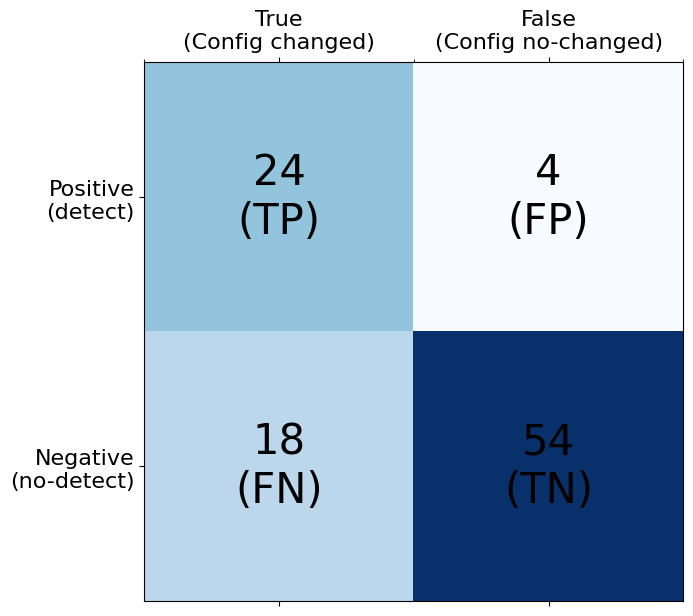

Accuracy  = 97.0 %
Precision = 97.6 %
Recall    = 95.2 %
F1Score   = 96.4 %
TNR    = 98.3 %


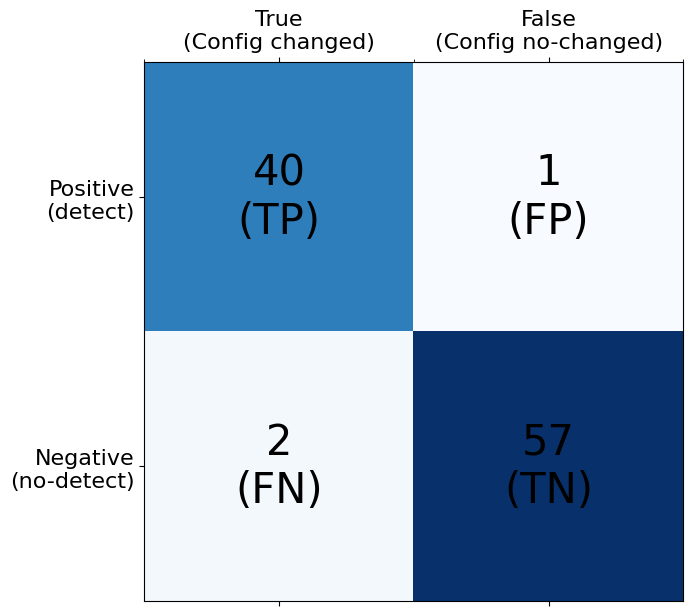

Accuracy  = 98.0 %
Precision = 97.6 %
Recall    = 97.6 %
F1Score   = 97.6 %
TNR    = 98.3 %


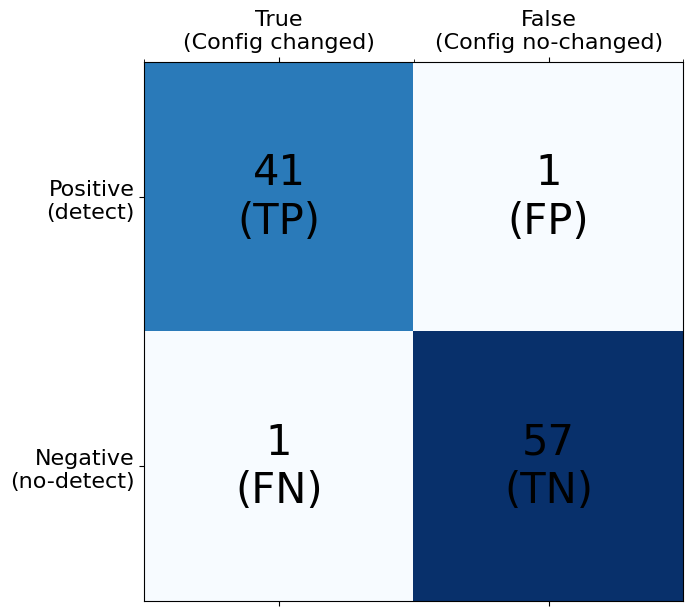

In [18]:
def plot_confusion_matrix(cm, type):
    # Confusion matrix values
    # cm = np.array([[50, 10], 
    #                [5, 35]])
    
    acc = round((cm[0][0] + cm[1][1])*100 / (sum(cm[0])+sum(cm[1])), 1)
    pre = round((cm[0][0])* 100 / (sum(cm[0]) ), 1)
    recall = round((cm[0][0])* 100 / (cm[0][0] + cm[1][0]), 1)
    f1score = round(2*(pre*recall) / (pre + recall), 1)
    tnr = round((cm[1][1])* 100 / (cm[0][1] + cm[1][1]), 1)
    
    print(f'Accuracy  = {acc} %')
    print(f'Precision = {pre} %')
    print(f'Recall    = {recall} %')
    print(f'F1Score   = {f1score} %')
    print(f'TNR    = {tnr} %')

    # Class labels
    classes1 = [f'True\n({type} changed)', f'False\n({type} no-changed)']
    classes2 = ['Positive\n(detect)', 'Negative\n(no-detect)']

    # Create the plot
    fig, ax = plt.subplots(figsize=(7,7))
    cax = ax.matshow(cm, interpolation='nearest', cmap='Blues')

    # Add colorbar
    # plt.colorbar(cax, shrink=0.8)

    # Set axis labels
    ax.set_xticklabels([''] + classes1, fontsize=16)
    ax.set_yticklabels([''] + classes2, fontsize=16)

    # Add annotations
    for (i, j), val in np.ndenumerate(cm):
        if (i, j) == (0, 0):
            plt.text(j, i, f'{val}\n(TP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (0, 1):
            plt.text(j, i, f'{val}\n(FP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 0):
            plt.text(j, i, f'{val}\n(FN)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 1):
            plt.text(j, i, f'{val}\n(TN)', ha='center', va='center', color='black', fontsize=30)

    # Customize gridlines and layout
    ax.set_xticks(np.arange(-0.5, len(classes1), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(classes2), 1), minor=True)
    ax.tick_params(which='minor', bottom=False, left=False)

    # Add title
    # plt.title('Confusion Matrix', fontsize=20)

    plt.show()
    
plot_confusion_matrix(cm=get_confusion_matrix(read_tracking_result(t=0.2)), type='Config')
plot_confusion_matrix(cm=get_confusion_matrix(read_tracking_result(t=1.0)), type='Config')
plot_confusion_matrix(cm=get_confusion_matrix(read_tracking_result(t=2.0)), type='Config')

## Plot CD error

[TFS] Average detected time error: -0.21
[FSD] Average detected time error: -0.24


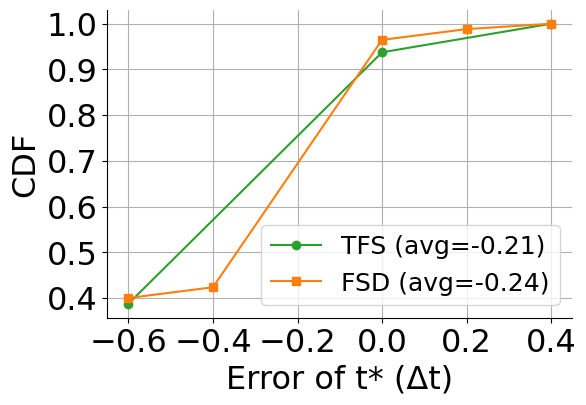

In [19]:
def plot_tfs_cd_err(fs=[23,18]):
    

    # Read the CSV file into a DataFrame
    tfs_filename = 'cd-tfs_error.csv'
    fsd_filename = 'cd-fsd_error.csv'
    tfs = pd.read_csv(tfs_filename, header=None, names=['x', 'frequency'])
    fsd = pd.read_csv(fsd_filename, header=None, names=['x', 'frequency'])
    
    
    # Calculate the average of the x-values weighted by frequency
    tfs_mean = round((tfs['x'] * tfs['frequency']).sum() / tfs['frequency'].sum(),2)
    fsd_mean = round((fsd['x'] * fsd['frequency']).sum() / fsd['frequency'].sum(),2)
    print(f"[TFS] Average detected time error: {tfs_mean}")
    print(f"[FSD] Average detected time error: {fsd_mean}")

    # Calculate the CDF
    tfs['cumulative'] = tfs['frequency'].cumsum()
    tfs['cdf'] = tfs['cumulative'] / tfs['frequency'].sum()
    
    fsd['cumulative'] = fsd['frequency'].cumsum()
    fsd['cdf'] = fsd['cumulative'] / fsd['frequency'].sum()

    # Sort the tfs by the x-values
    tfs.sort_values('x', inplace=True)
    fsd.sort_values('x', inplace=True)

    # Plot the CDF
    plt.figure(figsize=(6, 4))
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.plot(tfs['x'], tfs['cdf'], marker='o', linestyle='-', color='tab:green', label=f'TFS (avg={tfs_mean})')
    plt.plot(fsd['x'], fsd['cdf'], marker='s', linestyle='-', color='tab:orange', label=f'FSD (avg={fsd_mean})')
    plt.xlabel('Error of t* (\u0394t)', fontsize=fs[0])
    plt.ylabel('CDF', fontsize=fs[0])
    plt.xticks(fontsize=fs[0])
    plt.yticks(fontsize=fs[0])
    plt.legend(fontsize=fs[1])
    plt.grid(True)
    plt.show()
    
plot_tfs_cd_err()

In [20]:
def get_norm_dict(data):
    norm_data = {}
    for key, val in data.items():
        for i in range(val):
            val = key
            r = random.randint(0,9)
            if r == 0:
                val -= 0.10
            elif r == 1 or r == 2:
                val -= 0.05
            elif r == 3 or r == 4 or r == 5 or r == 6:
                val -= 0
            elif r == 7 or r == 8:
                val += 0.05
            else:
                val += 0.10
                
            val = round(val,2)
            if val not in norm_data.keys():
                norm_data[val] = 1
            else:
                norm_data[val] += 1
                
    return dict(sorted(norm_data.items()))

In [21]:
def plot_cd_err(fig_size=(10,5), fs=[24,20], output='Thesis'):
    

    # Read the CSV file into a DataFrame
    tfs_filename = 'cd-tfs_error.csv'
    fsd_filename = 'cd-fsd_error.csv'
    
    tfs = {}
    fsd = {}
    with open(tfs_filename, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            tfs[float(row[0])] = int(row[1])
            
    with open(fsd_filename, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            fsd[float(row[0])] = int(row[1])
    
    norm_tfs = get_norm_dict(tfs)
    norm_fsd = get_norm_dict(fsd)
    
    print(norm_tfs)
    print(norm_fsd)
    
    
    # Calculate the average of the x-values weighted by frequency
    tfs_mean = 0.
    fsd_mean = 0.
    for key, val in norm_tfs.items():
        tfs_mean += key*val
    tfs_mean = round(tfs_mean/sum(norm_tfs.values()),2)
    for key, val in norm_fsd.items():
        fsd_mean += key*val
    fsd_mean = round(fsd_mean/sum(norm_fsd.values()),2)
    print(f"[TFS] Average detected time error: {tfs_mean}")
    print(f"[FSD] Average detected time error: {fsd_mean}")

    # Calculate the CDF
    tfs_cdf = np.cumsum([freq / sum(norm_tfs.values()) for freq in norm_tfs.values()])
    fsd_cdf = np.cumsum([freq / sum(norm_fsd.values()) for freq in norm_fsd.values()])

    # Plot the CDF
    plt.figure(figsize=fig_size)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.plot(norm_tfs.keys(), tfs_cdf, marker='o', linestyle='-', linewidth=3, color='tab:green', label=f'Total flow size (avg={tfs_mean})')
    plt.plot(norm_fsd.keys(), fsd_cdf, marker='s', linestyle='--', linewidth=3, color='tab:orange', label=f'Flow size distribution (avg={fsd_mean})')
    plt.xlabel('Detection error (t\' - t*)', fontsize=fs[0])
    plt.ylabel('CDFs', fontsize=fs[0])
    
    xticks_label = [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4]
    plt.xticks(xticks_label, [f'{key}s' for key in xticks_label], fontsize=fs[1])
    plt.yticks(fontsize=fs[1])
    plt.legend(fontsize=fs[1])
    plt.grid(True)
    plt.tight_layout()
    
    if output != '':
        if output == 'Slide':
            plt.savefig(f'../{output}/result/CD_error.png')
        else:
            plt.savefig(f'../{output}/result/CD_error.pdf')
    plt.show()
    
# plot_cd_err()

{-0.7: 1, -0.65: 5, -0.6: 16, -0.55: 7, -0.5: 2, -0.1: 4, -0.05: 6, 0.0: 22, 0.05: 9, 0.1: 3, 0.3: 2, 0.4: 3}
{-0.7: 5, -0.65: 7, -0.6: 14, -0.55: 7, -0.5: 1, -0.45: 1, -0.3: 1, -0.1: 5, -0.05: 8, 0.0: 22, 0.05: 6, 0.1: 5, 0.2: 1, 0.25: 1, 0.3: 1}
[TFS] Average detected time error: -0.21
[FSD] Average detected time error: -0.25


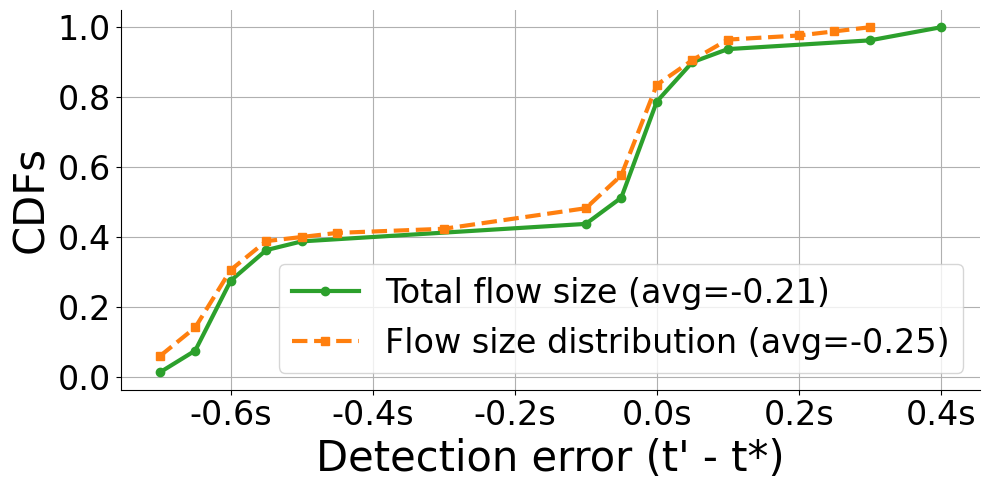

{-0.7: 1, -0.65: 3, -0.6: 18, -0.55: 4, -0.5: 5, -0.1: 4, -0.05: 14, 0.0: 13, 0.05: 6, 0.1: 7, 0.3: 1, 0.35: 1, 0.4: 1, 0.5: 2}
{-0.7: 5, -0.65: 5, -0.6: 13, -0.55: 7, -0.5: 4, -0.45: 1, -0.4: 1, -0.1: 10, -0.05: 4, 0.0: 17, 0.05: 11, 0.1: 4, 0.2: 1, 0.25: 1, 0.3: 1}
[TFS] Average detected time error: -0.2
[FSD] Average detected time error: -0.24


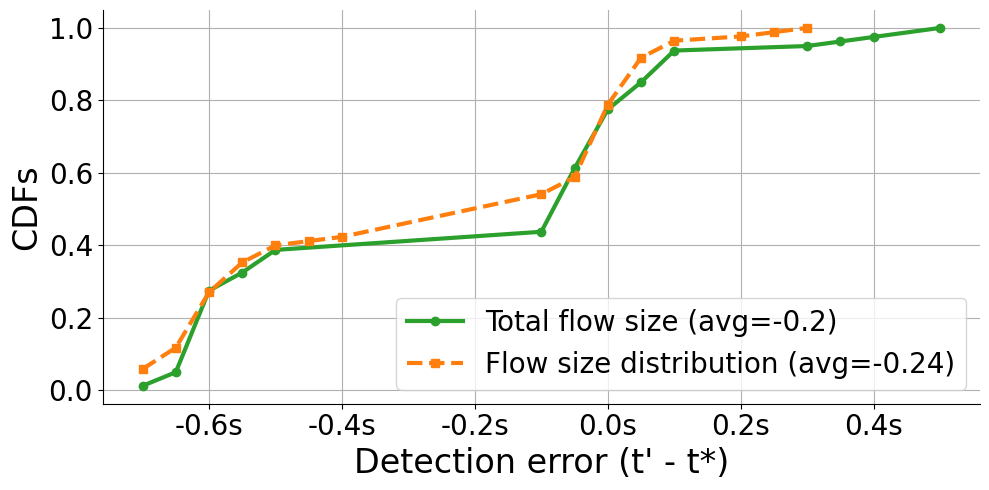

{-0.7: 3, -0.65: 9, -0.6: 10, -0.55: 4, -0.5: 5, -0.1: 4, -0.05: 15, 0.0: 16, 0.05: 7, 0.1: 2, 0.35: 1, 0.4: 2, 0.45: 2}
{-0.65: 8, -0.6: 15, -0.55: 8, -0.5: 3, -0.3: 2, -0.1: 3, -0.05: 8, 0.0: 21, 0.05: 9, 0.1: 6, 0.2: 1, 0.45: 1}
[TFS] Average detected time error: -0.21
[FSD] Average detected time error: -0.23


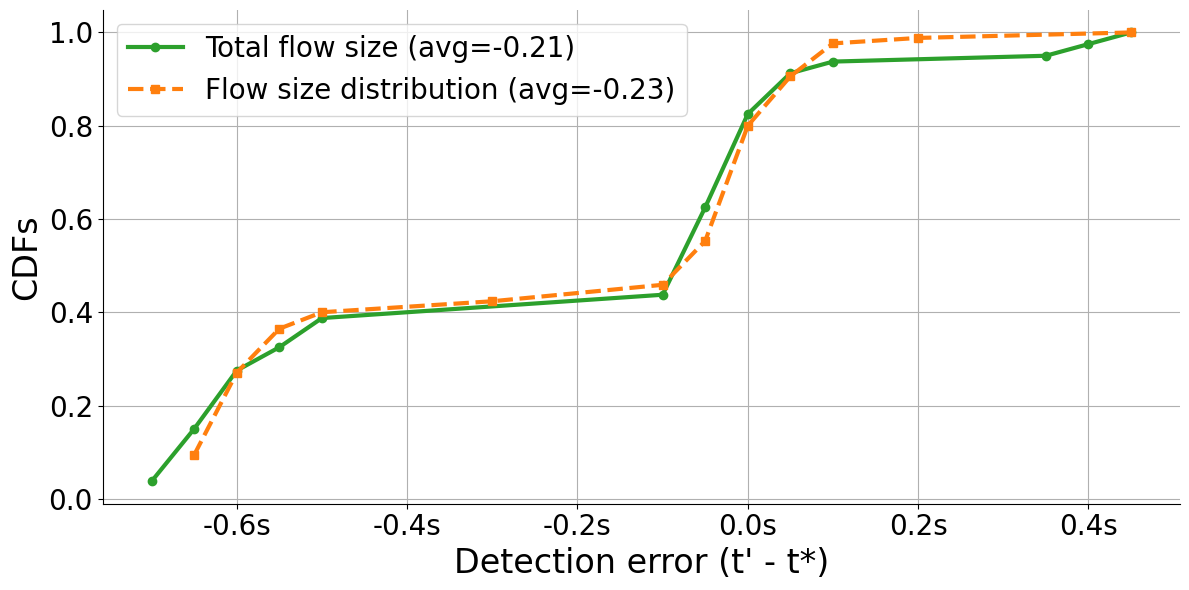

In [22]:
# slide
plot_cd_err(fig_size=(10,5), fs=[30,24], output='Slide')


# conference
plot_cd_err(fig_size=(10,5), fs=[24,20], output='Conference')

# thesis
plot_cd_err(fig_size=(12,6), fs=[24,20], output='Thesis')

## Plot impact of sigma


In [23]:
def read_dev_result(filename='impact_dev_output.csv'):
    res = {}

    # Reading the data from a CSV file
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        
        # Skip the header
        next(reader)
        
        # Read each row and add the data to the dictionary
        for row in reader:
            key = float(row[0])
            values = list(map(float, row[1:-1]))
            redundant = row[-1]
            res[key] = values
            res[key].append(redundant)
            
    return res


In [24]:
def plot_dev_impact(fs=[26,24], output='Thesis', fig_size=(8,6)):
    res = read_dev_result('impact_dev_output.csv')
            
    devs = list(res.keys())
    
    tfs_recall = [res[i][0] for i in devs]
    tfs_precision = [res[i][1] for i in devs]
    fsd_recall = [res[i][2] for i in devs]
    fsd_precision = [res[i][3] for i in devs]
    
    all_data = [tfs_recall, tfs_precision, fsd_recall, fsd_precision]
    

    labels = ['TFS_Recall', 'TFS_Precision', 'FSD_Recall', 'FSD_Precision']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['////', 'XX', '\\\\\\\\', '..']
    bar_width = 0.2
    x = np.arange(len(devs))
    
    from matplotlib import cm
    greens = cm.Greens(np.linspace(0.4, 0.8, 2))
    colors_g = np.concatenate([greens])
    blues = cm.Blues(np.linspace(0.4, 0.8, 2))
    colors_b = np.concatenate([blues])
    colors = np.concatenate([greens, blues])

    # Plot
    fig, ax = plt.subplots(figsize=fig_size)

    for i in range(4):
        bar_positions = x + i * bar_width - bar_width * 1.5  # Adjust positions
        bar_values = all_data[i]
        ax.bar(bar_positions, bar_values, bar_width, label=labels[i], color=colors[i], hatch=hatches[i], edgecolor='black', zorder=2)
        # ax.bar(bar_positions, bar_values, bar_width, color=colors, edgecolor='black', hatch=hatches[i])


    # Plotting the first subplot
    # bars1 = ax1.bar(np.arange(4), res, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=[f't = {l}s'for l in len])
    # Adding labels and title
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel('\u03c3', fontsize=fs[0])
    ax.set_ylabel('Ratio (%)', fontsize=fs[0])
    # ax.set_title(f'Impact of detection errors & identification time', fontsize=20)
    # ax.set_ylim(0, 20)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks(x)
    ax.set_xticklabels(f'{xlabel}' for xlabel in devs)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[1], loc='lower right')


    fig.tight_layout()
    if output != '':
        plt.savefig(f'../{output}/result/dev.pdf')

    plt.show()        
    
    return


In [25]:
def plot_dev_impact_acc(fs=[26,24], output='Thesis', fig_size=(8,6)):
    res = read_dev_result('impact_dev_output.csv')
            
    devs = list(res.keys())
    
    pattern_acc = [res[i][4] for i in devs]
    config_acc = [res[i][5] for i in devs]
    redundant = [res[i][6] for i in devs]
    print(redundant)
    
    all_data = [pattern_acc, config_acc]
    

    labels = ['Pattern Identification', 'Optimal Configuration']
    colors = ['tab:orange', 'tab:red']
    hatches = ['XX', '..']
    bar_width = 0.25
    x = np.arange(len(devs))
    

    # Plot
    fig, ax = plt.subplots(figsize=fig_size)

    for i in range(len(all_data)):
        bar_positions = x + i * bar_width - bar_width*0.5   # Adjust positions
        bar_values = all_data[i]
        ax.bar(bar_positions, bar_values, bar_width, label=labels[i], color=colors[i], hatch=hatches[i], edgecolor='black', zorder=2)
        # ax.bar(bar_positions, bar_values, bar_width, color=colors, edgecolor='black', hatch=hatches[i])


    # Plotting the first subplot
    # bars1 = ax1.bar(np.arange(4), res, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=[f't = {l}s'for l in len])
    # Adding labels and title
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel('\u03c3', fontsize=fs[0])
    ax.set_ylabel('Accuracy (%)', fontsize=fs[0])
    # ax.set_title(f'Impact of detection errors & identification time', fontsize=20)
    # ax.set_ylim(0, 20)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks(x)
    ax.set_xticklabels(f'{xlabel}' for xlabel in devs)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[1], loc='lower right')


    fig.tight_layout()
    if output != '':
        plt.savefig(f'../{output}/result/dev_acc.pdf')

    plt.show()        
    
    return


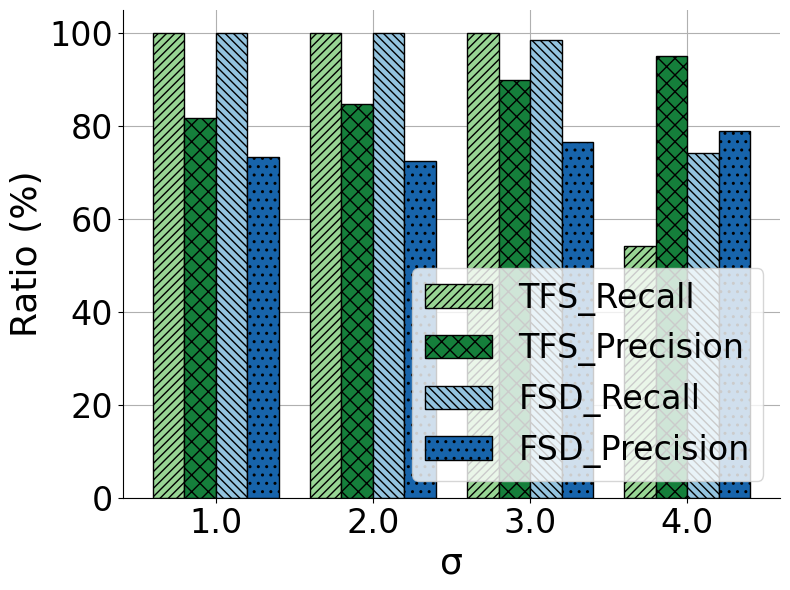

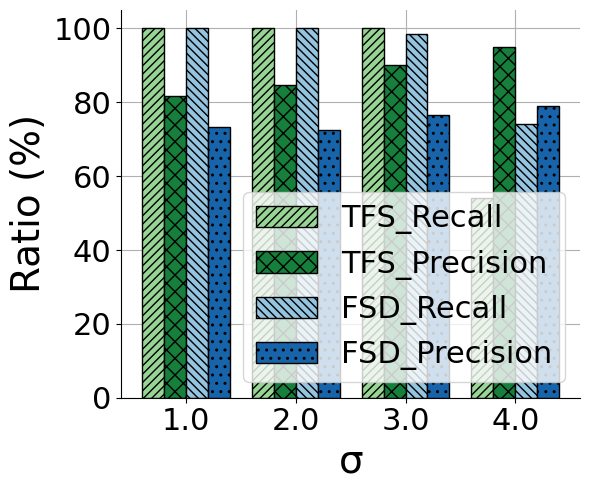

['46/90', '48/91', '47/90', '37/75']


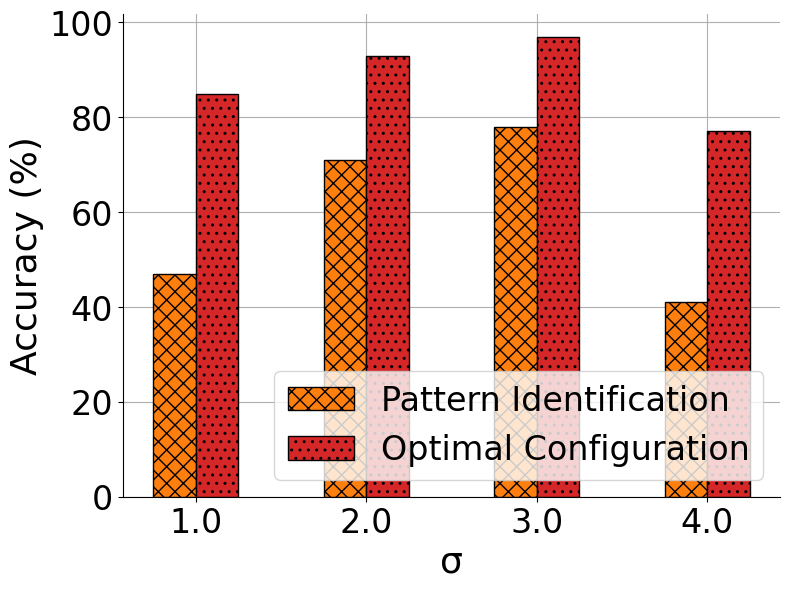

['46/90', '48/91', '47/90', '37/75']


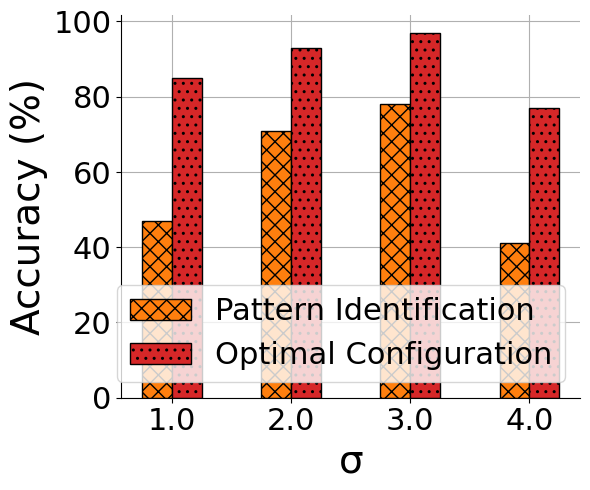

In [26]:
plot_dev_impact()
plot_dev_impact(output='Conference', fig_size=(6,5), fs=[28,22])
plot_dev_impact_acc()
plot_dev_impact_acc(output='Conference', fig_size=(6,5), fs=[28,22])

## Plot impact of pattern


In [27]:
def read_pattern_result(filename='impact_pattern_output.csv'):
    res = {}

    bins_number = 7
    mem = 4
    
    all = []
    
    # Reading the data from a CSV file
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        
        cnt = 0
        single = []
        for row in reader:
            values = list(map(float, row))
            # print(values)
            single.append(values)    
            cnt += 1
            
            if cnt == bins_number:
                cnt = 0
                all.append(single)
                single = []
                
    return all
# read_pattern_result()

In [32]:
def plot_pattern_impact(fs=[28,24], output='Thesis', fig_size=(12,5)):
    
    all = read_pattern_result(filename='impact_pattern_output.csv')
    
    bins = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
    
    fig, ax = plt.subplots(figsize=fig_size)
    positionss = []
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['////', 'XX', '\\\\\\\\', '..']
    markers = ["o", "^", "s", "D"]
    
    base_position = np.arange(1, len(all[0]) + 1) * (len(all) + 1)
    positionss = [base_position - 1.05, base_position - 0.35, base_position + 0.35, base_position + 1.05] 
    
    for i in range(len(all)):
        plt.boxplot(all[i], positions=positionss[i], widths=0.6, patch_artist=True, 
            boxprops=dict(facecolor=colors[i], hatch=hatches[i]), 
            medianprops=dict(color="black"), showfliers=False)
    plt.xticks(base_position, bins, fontsize=fs[1])
    plt.yticks(fontsize=fs[1])
    
    from matplotlib.patches import Patch
    legend_handles = [
        Patch(facecolor=colors[0], edgecolor='black', hatch=hatches[0], label='Mem=32KB'),
        Patch(facecolor=colors[1], edgecolor='black', hatch=hatches[1], label='Mem=64KB'),
        Patch(facecolor=colors[2], edgecolor='black', hatch=hatches[2], label='Mem=128KB'),
        Patch(facecolor=colors[3], edgecolor='black', hatch=hatches[3], label='Mem=256KB')
    ]
    plt.legend(handles=legend_handles, loc='upper left', fontsize=fs[1], ncol=2, labelspacing=0.3)
    plt.gca().spines[['top', 'right']].set_visible(False)

    # Add labels and title
    plt.xlabel('WMRD', fontsize=fs[0])
    plt.ylabel('ARE Reduction', fontsize=fs[0])
    # plt.title('Side by Side Boxplots for 4 Datasets across 7 Categories')

    # Show the plot
    plt.grid()
    plt.tight_layout()
    
    if output != '':
        plt.savefig(f'../{output}/result/pattern.pdf')
    
    plt.show()
    
    return    



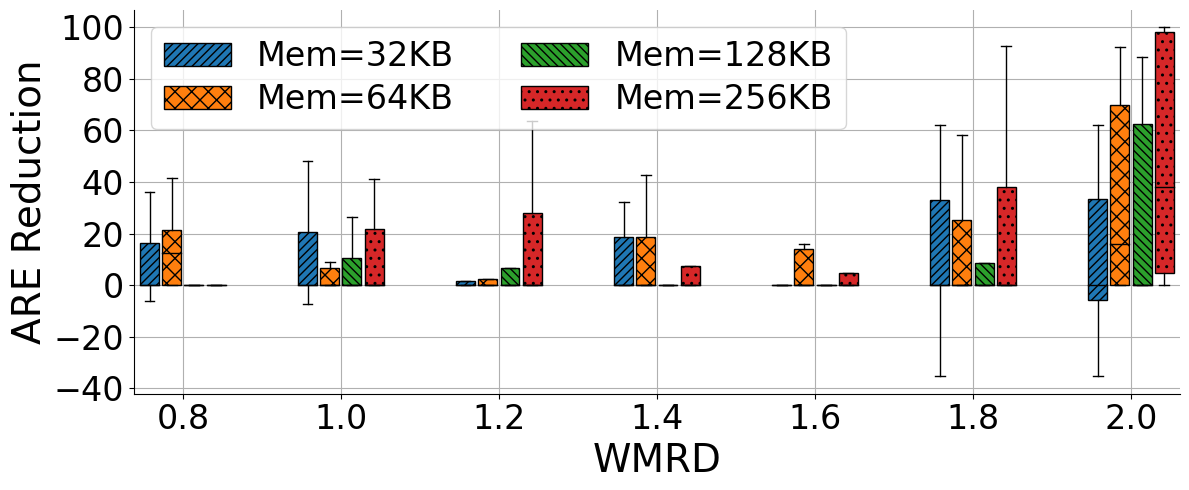

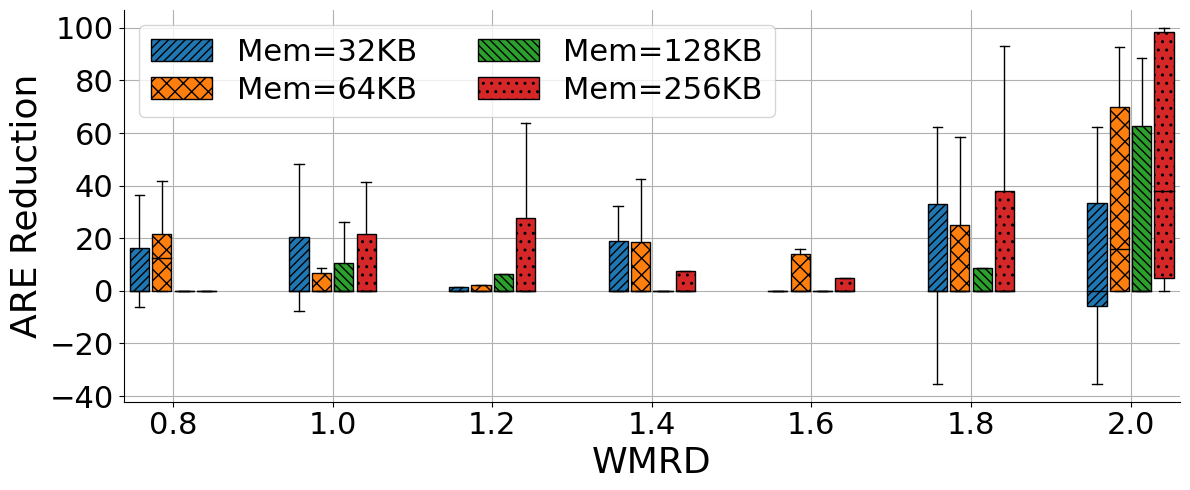

In [33]:
plot_pattern_impact()
plot_pattern_impact(fs=[26,22], output='Conference')

## Plot overall Performance
---


In [19]:
def read_performance_result(filename='hh_output.csv'):
    res = {}

    # Reading the data from a CSV file
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        
        # Skip the header
        next(reader)
        
        # Read each row and add the data to the dictionary
        for row in reader:
            key = int(row[0])
            values = list(map(float, row[1:]))
            res[key] = values
            
    return res

In [20]:
def plot_hh_overall(width=[1024, 2048, 4096, 8192, 16384], fs=[23,20], output='Thesis'):
    AREs = read_performance_result('hh_output.csv')
            
    # plot 
    oracle_means = [AREs[w][0] for w in width]
    ours_means = [AREs[w][1] for w in width]
    unchange_means = [AREs[w][2] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='$sk$Track', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)


    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('ARE', fontsize=fs[0])
    # ax.set_title('ARE by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[1])

    fig.tight_layout()
    if output != '':
        plt.savefig(f'../{output}/result/hh_overall.pdf')

    plt.show()        
    
    return
# plot_hh_overall()

In [26]:
def plot_fsd_overall(width=[1024, 2048, 4096, 8192, 16384], fs=[24,18,18], output='Thesis'):
    WMRDs = read_performance_result('fsd_output.csv')
            
    # plot 
    oracle_means = [WMRDs[w][0] for w in width]
    ours_means = [WMRDs[w][1] for w in width]
    unchange_means = [WMRDs[w][2] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)

    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('WMRD', fontsize=fs[0])
    # ax.set_title('WMRD by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2], loc='lower left')

    fig.tight_layout()
    if output != '':
        plt.savefig(f'../{output}/result/fsd_overall.pdf')
    plt.show()        
    
    return
# plot_fsd_overall()

In [27]:
def plot_ent_overall(width=[1024, 2048, 4096, 8192, 16384], fs=[24,18,18], output='Thesis'):
    REs = read_performance_result('ent_output.csv')
            
    # plot 
    oracle_means = [REs[w][0] for w in width]
    ours_means = [REs[w][1] for w in width]
    unchange_means = [REs[w][2] for w in width]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    bars1 = ax.bar(x - bar_width, oracle_means, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x, ours_means, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)

    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('RE', fontsize=fs[0])
    # ax.set_title('RE by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[2])

    fig.tight_layout()
    if output != '':
        plt.savefig(f'../{output}/result/ent_overall.pdf')

    plt.show()        
    
#     return
# plot_ent_overall()

---


In [35]:
def plot_hh_reduction(width=[1024, 2048, 4096, 8192, 16384], fs=[23,20], output='Thesis', fig_size=(10,5)):
    AREs = read_performance_result('hh_output.csv')
            
    # plot 
    oracle_means = [AREs[w][0] for w in width]
    ours_means = [AREs[w][1] for w in width]
    unchange_means = [AREs[w][2] for w in width]
    
    # error reduction
    oracle_reduction = [round(((unchange_means[i]-oracle_means[i])/unchange_means[i])*100,1) for i in range(len(oracle_means))]
    ours_reduction = [round(((unchange_means[i]-ours_means[i])/unchange_means[i])*100,1) for i in range(len(ours_means))]
    print(ours_reduction)

    x = np.arange(len(width))  # the label locations
    bar_width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize=fig_size)
    bars1 = ax.bar(x - 0.5*bar_width, oracle_reduction, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    if output == "Slide":
        bars2 = ax.bar(x + 0.5*bar_width, ours_reduction, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    else:    
        bars2 = ax.bar(x + 0.5*bar_width, ours_reduction, bar_width, label='$sk$Track', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    # bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)


    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory size', fontsize=fs[0])
    ax.set_ylabel('ARE reduction (%)', fontsize=fs[0])
    # ax.set_title('ARE by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[1], loc='lower left')

    fig.tight_layout()
    if output != '':
        if output == 'Slide':
            plt.savefig(f'../{output}/result/hh_error_reduction.png')
        else:
            plt.savefig(f'../{output}/result/hh_error_reduction.pdf')
    plt.show()        
    
#     return
# plot_hh_reduction()

In [29]:
def plot_fsd_reduction(width=[1024, 2048, 4096, 8192, 16384], fs=[23,20], output='Thesis'):
    WMRDs = read_performance_result('fsd_output.csv')
            
    # plot 
    oracle_means = [WMRDs[w][0] for w in width]
    ours_means = [WMRDs[w][1] for w in width]
    unchange_means = [WMRDs[w][2] for w in width]

   # error reduction
    oracle_reduction = [round((unchange_means[i]-oracle_means[i])/unchange_means[i],2)*100 for i in range(len(oracle_means))]
    ours_reduction = [round((unchange_means[i]-ours_means[i])/unchange_means[i],2)*100 for i in range(len(ours_means))]

    x = np.arange(len(width))  # the label locations
    bar_width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 5))
    bars1 = ax.bar(x - 0.5*bar_width, oracle_reduction, bar_width, label='Oracle', color="tab:blue",hatch="XX", edgecolor='black', zorder=3)
    bars2 = ax.bar(x + 0.5*bar_width, ours_reduction, bar_width, label='Ours', color="tab:orange", hatch="\\\\\\\\", edgecolor='black', zorder=3)
    # bars3 = ax.bar(x + bar_width, unchange_means, bar_width, label='No reconfig', color="tab:green", hatch="..", edgecolor='black', zorder=3)

    plt.gca().spines[['top', 'right']].set_visible(False)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Memory', fontsize=fs[0])
    ax.set_ylabel('WMRD Reduction (%)', fontsize=fs[0])
    # ax.set_title('WMRD by Memory Size and Method with ±1 Std Dev Error Bars')
    ax.set_xticks(x)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.set_xticklabels([f'{int(w*4*4/1024)}KB' for w in width])
    ax.grid(zorder=0)
    ax.legend(fontsize=fs[1], loc='lower left')

    fig.tight_layout()
    if output != '':
        plt.savefig(f'../{output}/result/fsd_error_reduction.pdf')

    plt.show()        
    
#     return
# plot_fsd_reduction()

[16.0, 12.8, 16.2, 11.6, 21.4]


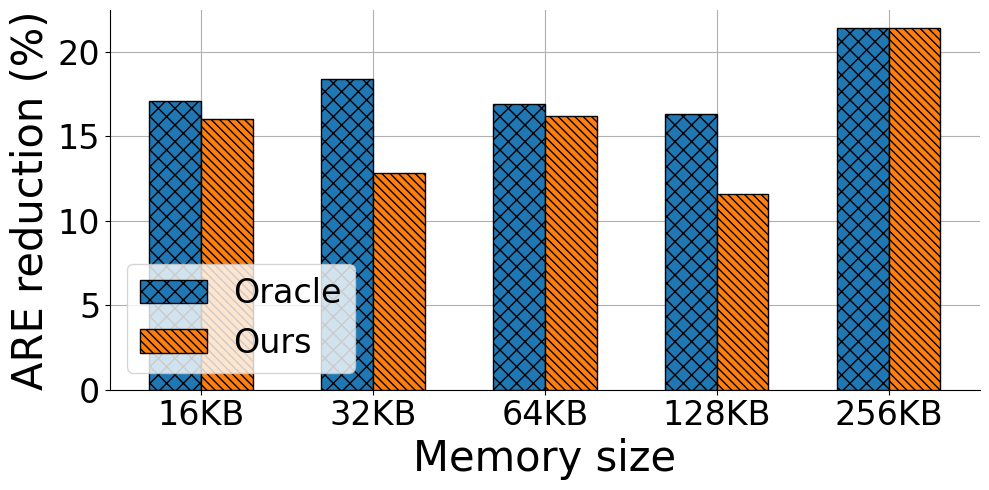

[16.0, 12.8, 16.2, 11.6, 21.4]


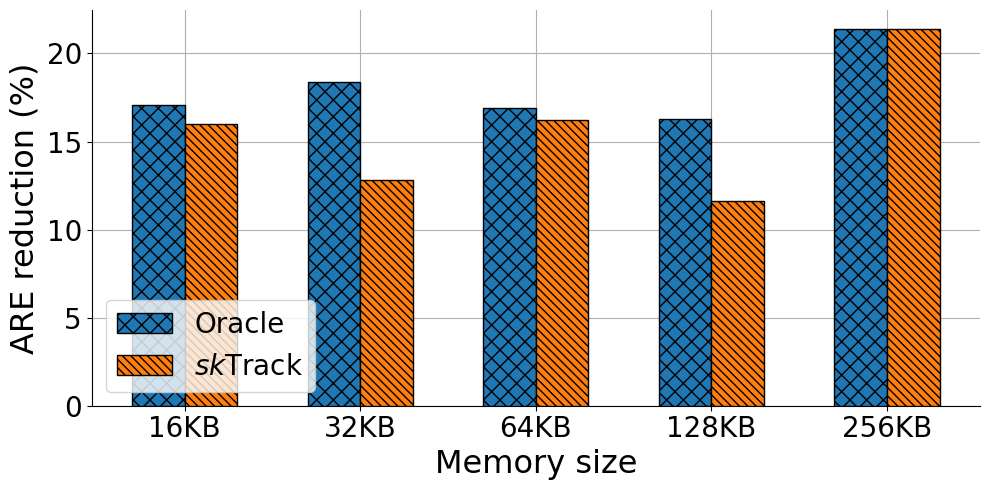

[16.0, 12.8, 16.2, 11.6, 21.4]


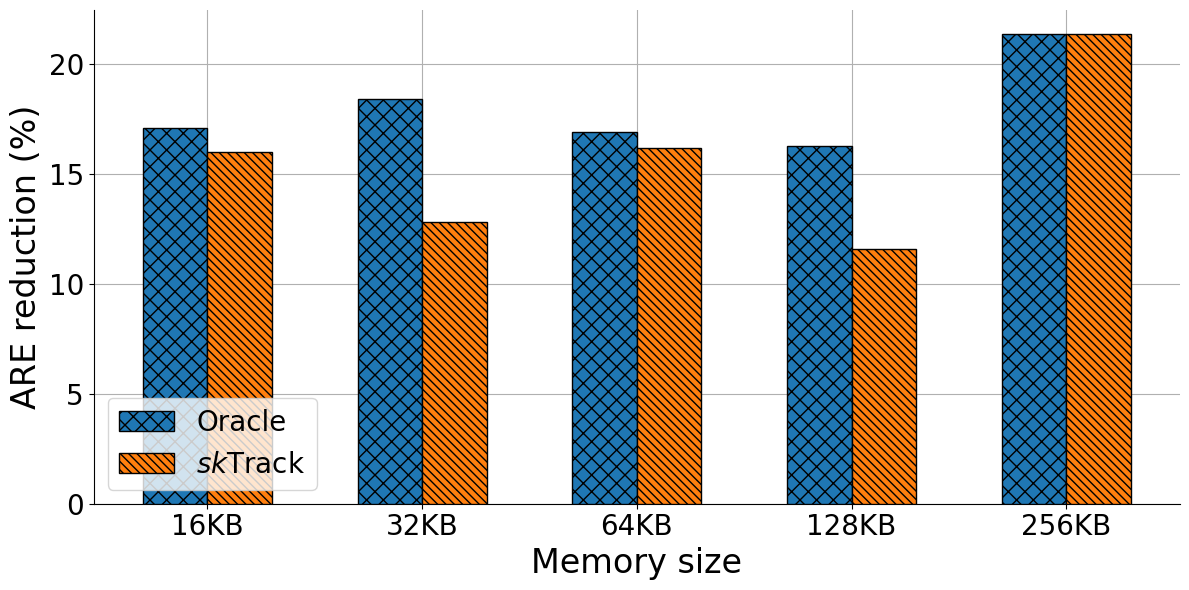

In [36]:
# slide
# plot_hh_overall(fs=[23,20], output='T')
plot_hh_reduction(fs=[30,24], output='Slide', fig_size=(10,5))


# Conference
plot_hh_reduction(fs=[23,20], output='Conference', fig_size=(10,5))

# Thesis
plot_hh_reduction(fs=[24,20], output='Thesis', fig_size=(12,6))